<a href="https://colab.research.google.com/github/ManikandanM13/BOA-DENSENET/blob/main/BOA_DENs_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif
import math
from math import sqrt
import tensorflow as tf
from tensorflow.keras import layers, models
import sklearn.metrics
from sklearn.svm import SVC
# Step 2: Load the dataset
file_path = '/content/drive/MyDrive/ColonTumor (1).csv'
df = pd.read_csv(file_path)
# Step 3:Display the first few rows to understand the structure
print(df.head())

# Step 4: Handle missing values (if any)
df = df.dropna()
# Drop rows with missing values

# Step 5: Handle categorical variables
# Use Label Encoding or One-Hot Encoding based on your needs
label_encoder = LabelEncoder()
df['result'] = label_encoder.fit_transform(df['result'])
# Alternatively, use one-hot encoding:
# df = pd.get_dummies(df, columns=['categorical_column'])

# Step 6: Split the dataset into features and labels
X = df.drop('result', axis=1)  # Features
y = df['result']  # Labelsprint(df.info())# Assuming 'Patients' is the column with patient identifiers
X = X.drop('Patients', axis=1)# Step 8: Min-Max Normalize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

    Patients  Gene 1  Gene 2  Gene 3  Gene 4  Gene 5  Gene 6  Gene 7  Gene 8  \
0  Patient 1  8590.0  5470.0  4260.0  4060.0  2000.0  5280.0  2170.0  2770.0   
1  Patient 2  9160.0  6720.0  4880.0  3720.0  2020.0  5570.0  3850.0  2790.0   
2  Patient 3  3830.0  6970.0  5370.0  4710.0  1170.0  1570.0  1330.0  1470.0   
3  Patient 4  6250.0  7820.0  5960.0  3980.0  2000.0  2130.0  1530.0  1710.0   
4  Patient 5  3230.0  3690.0  3400.0  3460.0  2180.0  2920.0  2070.0  2950.0   

   Gene 9  ...  Gene 1992  Gene 1993  Gene 1994  Gene 1995  Gene 1996  \
0  7530.0  ...       67.6     260.00      139.0       88.2       39.7   
1  7020.0  ...       92.2      96.30      151.0       82.2       85.0   
2  3300.0  ...       82.7      31.10      194.0       77.0      225.0   
3  3870.0  ...       41.7       5.93      183.0       74.5       67.7   
4  3300.0  ...       76.6     161.00       61.7       54.6      223.0   

   Gene 1997  Gene 1998  Gene 1999  Gene 2000    result  
0       67.8       75.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

BOA

In [ ]:
def butterfly_optimization(X_train, y_train, n_iterations):
    n_features = X_train.shape[1]
    n_population = 1936  # Number of butterflies
    n_global_search = int(0.4 * n_iterations)  # Percentage of iterations for global search
    n_local_search = n_iterations - n_global_search  # Percentage of iterations for local search
    switch_probability = 0.5  # Switching probability between global and local search

    # Initialize selected features randomly
    selected_features = np.random.choice(n_features, n_population, replace=True)
    best_solution = None
    best_fitness = 0

    for iteration in range(n_iterations):
        # Determine search phase
        if np.random.rand() < switch_probability:
            phase = "global"  # Global search
        else:
            phase = "local"  # Local search

        if phase == "global":
            # Perform global search (exploration)
            for i in range(n_population):
                # Randomly select a feature to update
                feature_to_update = np.random.randint(n_features)

                # Update the feature randomly
                selected_features[i] = feature_to_update
        else:
            # Perform local search (exploitation)
            for i in range(n_population):
                # Randomly select two butterflies other than the current one
                other_butterflies = np.random.choice(n_population, size=2, replace=False)
                butterfly_j, butterfly_k = other_butterflies

                # Update the feature based on BOA equations
                feature_to_update = int(0.5 * (selected_features[butterfly_j] - selected_features[butterfly_k]))

        # Evaluate the fitness of the selected features
        fitness = evaluate_fitness(X_train[:, selected_features], y_train)

        # Update the best solution if needed
        if fitness > best_fitness:
            best_solution = selected_features.copy()
            best_fitness = fitness

    # Return the best solution
    return best_solution


In [ ]:
# Define a function to evaluate the fitness of selected features using SVM classifier
def evaluate_fitness(X_selected, y):
    # Split the data into training and testing sets
    #X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Initialize and train the SVM classifier
    svm = SVC(kernel='linear')  # You can choose the kernel type based on your problem
    svm.fit(X_train, y_train)

    # Evaluate the trained model on the testing set
    accuracy = svm.score(X_test, y_test)

    return accuracy

# Apply BOA for feature selection
selected_features_indices = butterfly_optimization(X, y, n_iterations=100,)

# Select the features based on the indices
selected_features = X[:, selected_features_indices]

# Split the dataset into training and testing sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)




In [ ]:
print(selected_features.shape)

(62, 1936)


In [ ]:
print(X_train.shape)

(49, 1936)


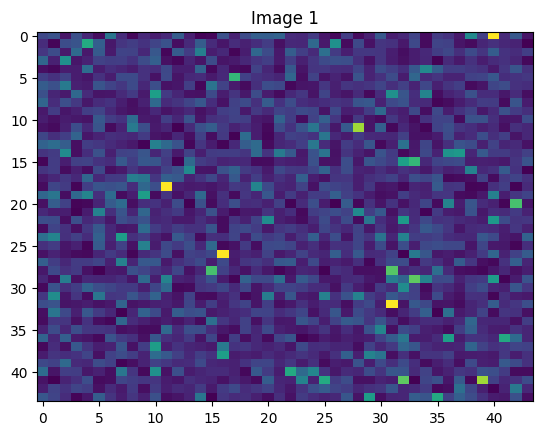

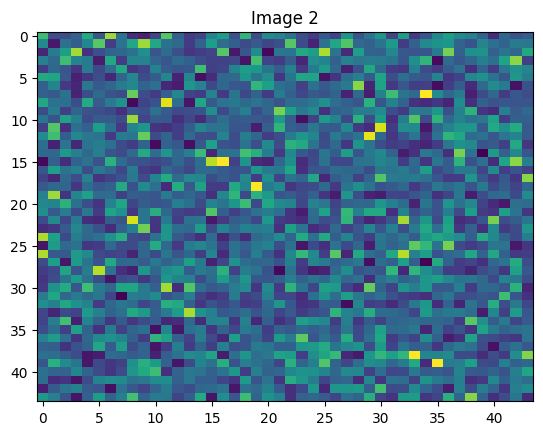

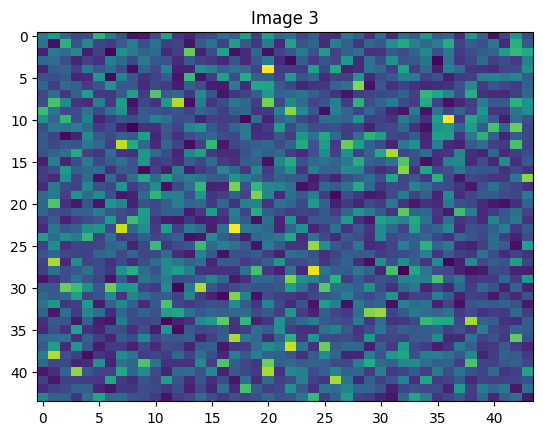

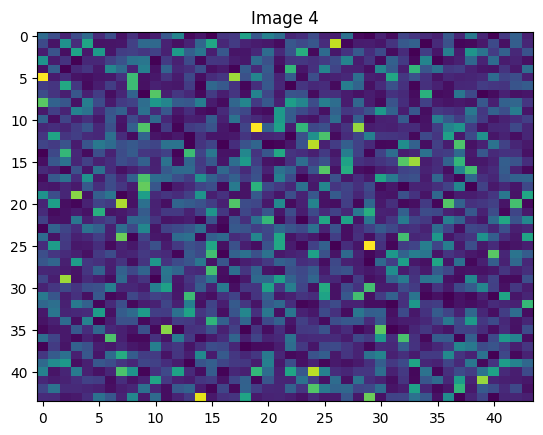

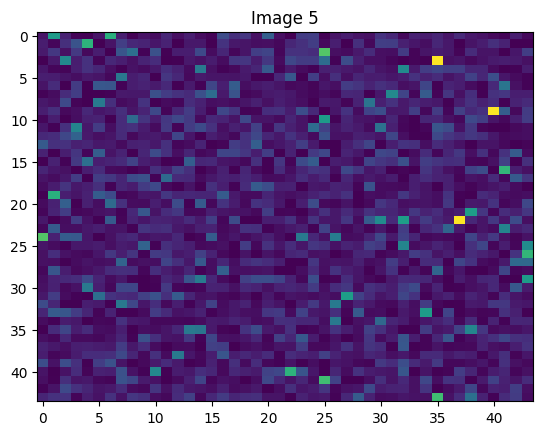

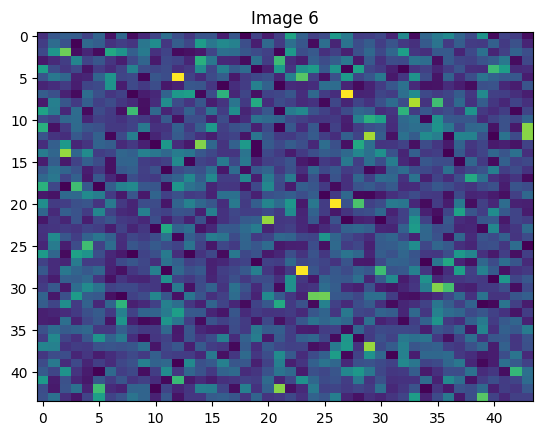

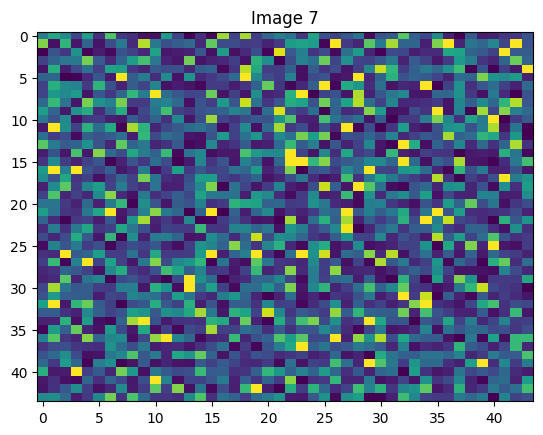

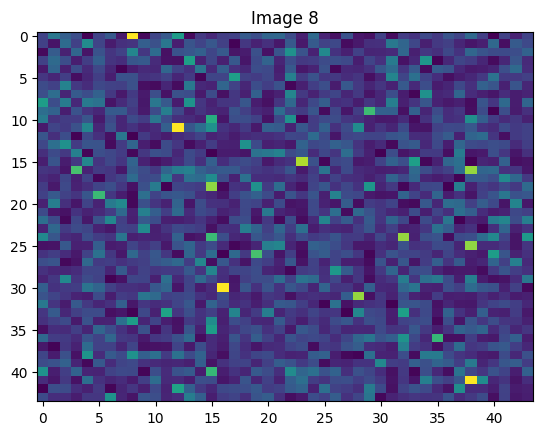

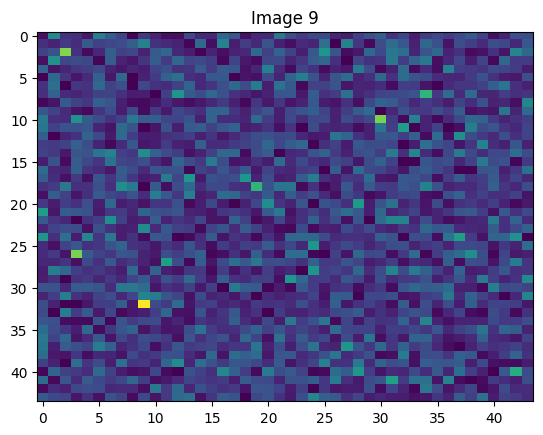

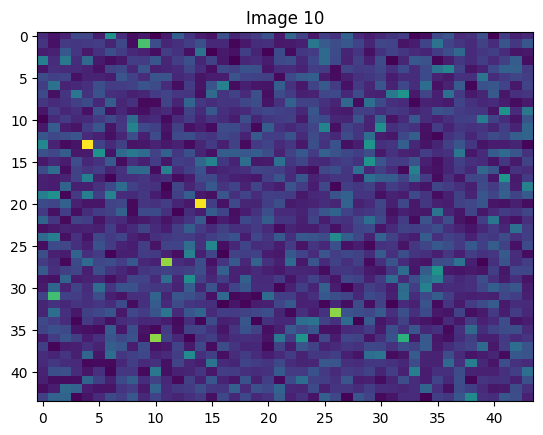

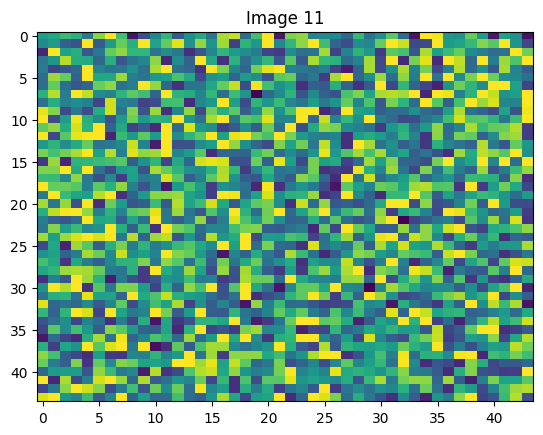

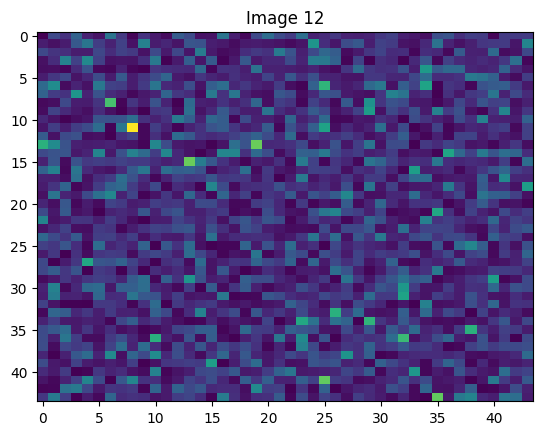

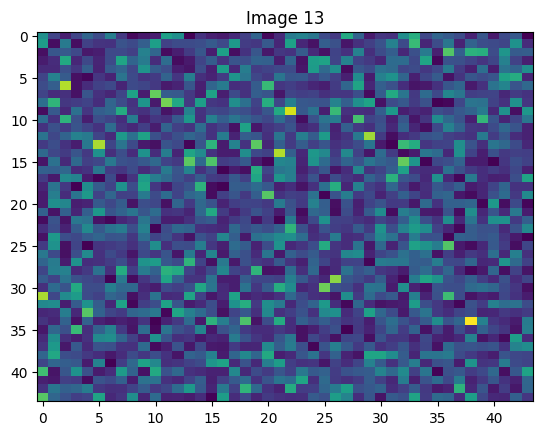

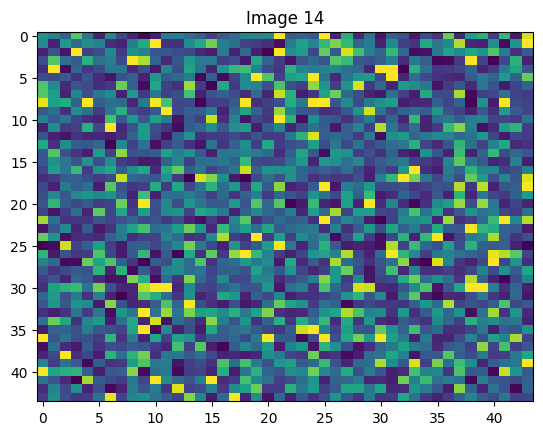

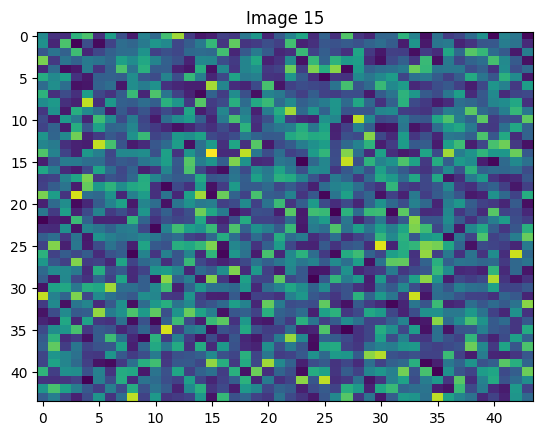

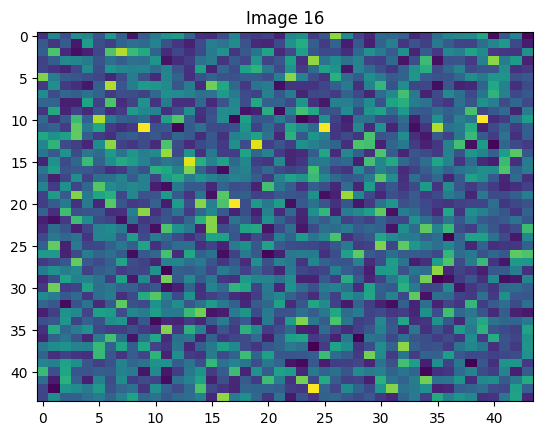

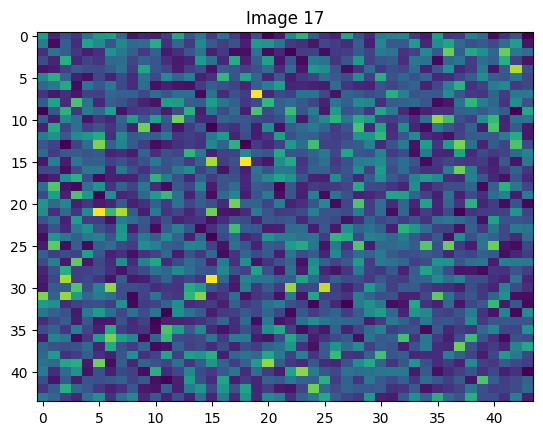

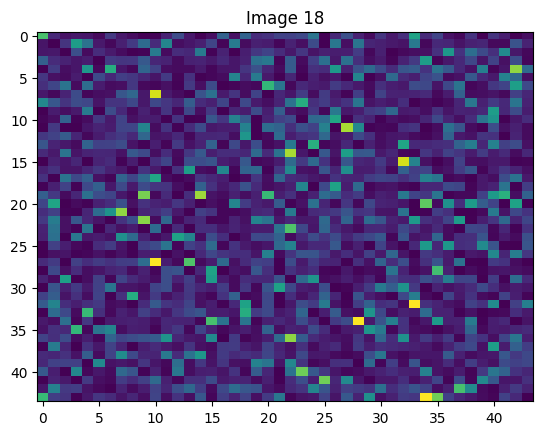

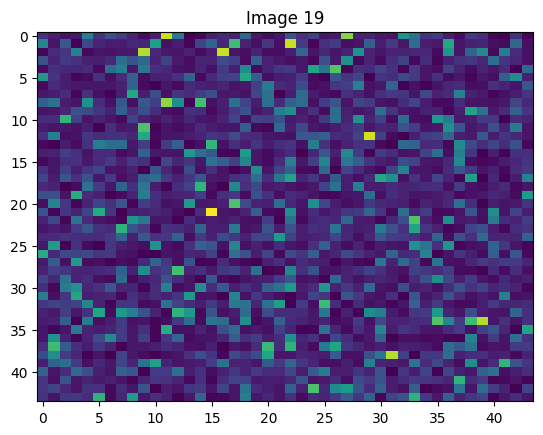

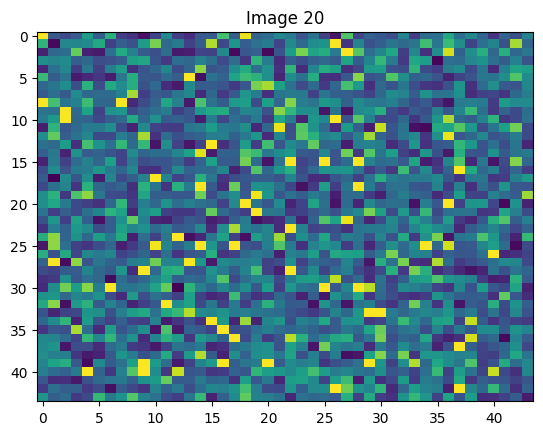

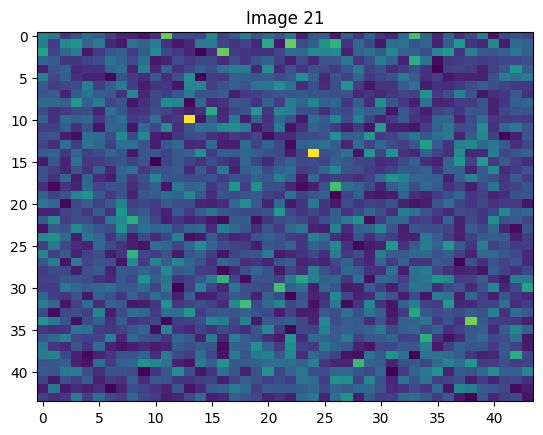

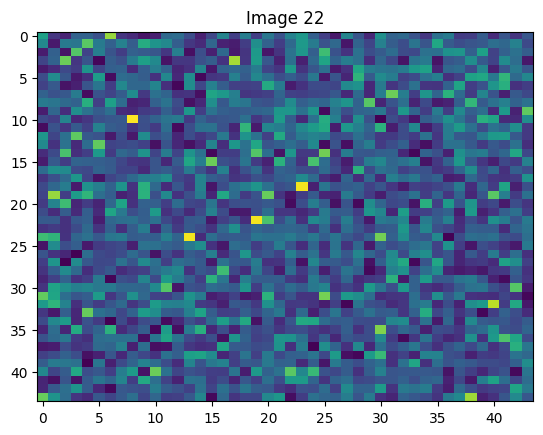

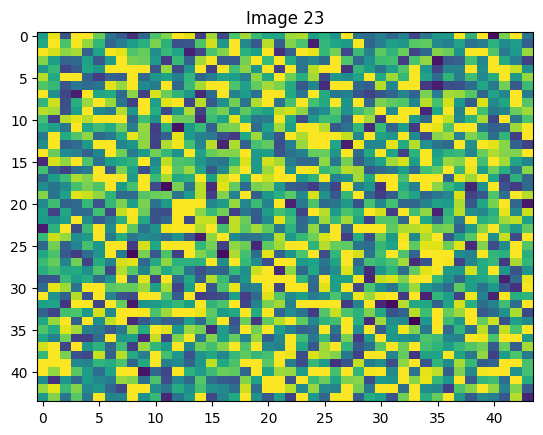

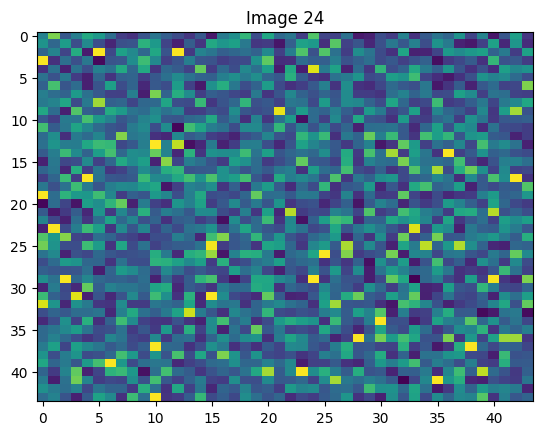

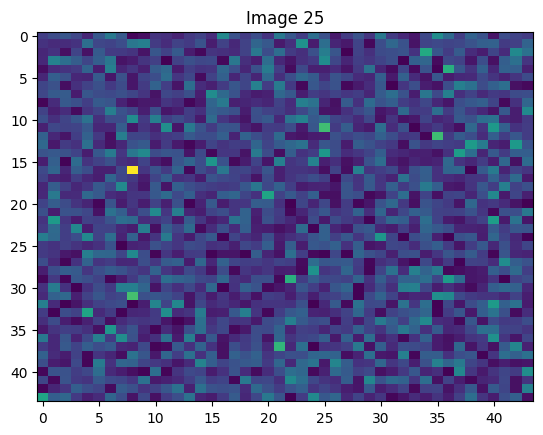

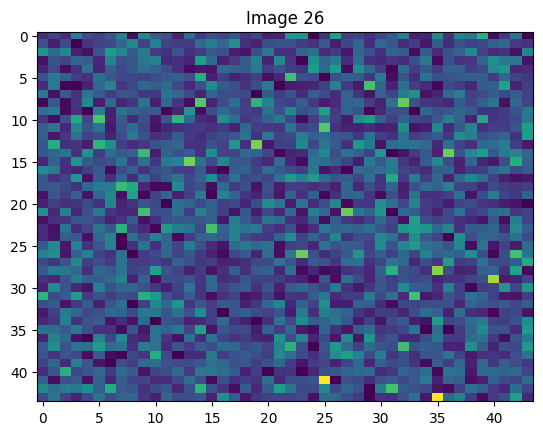

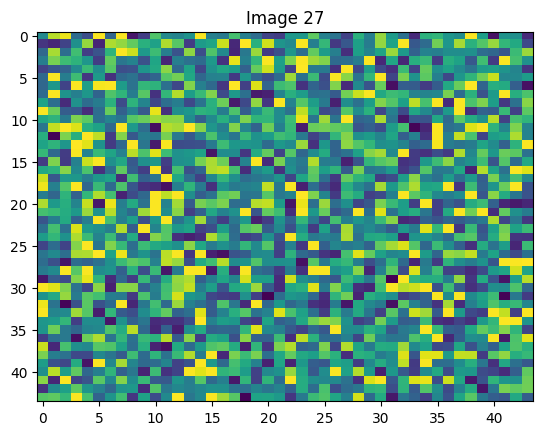

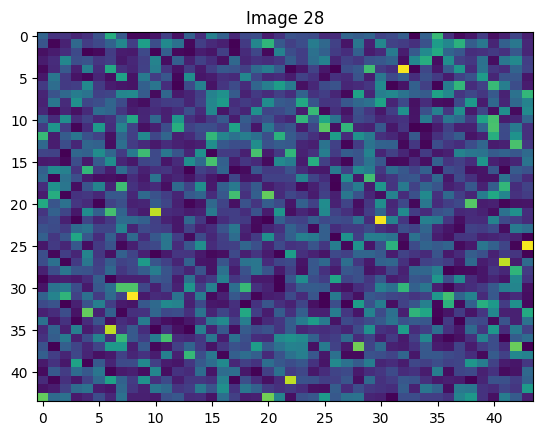

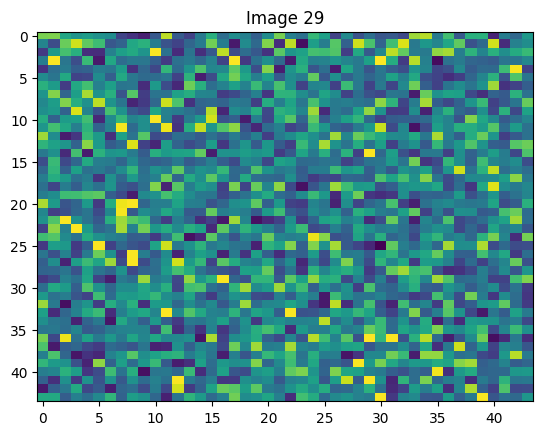

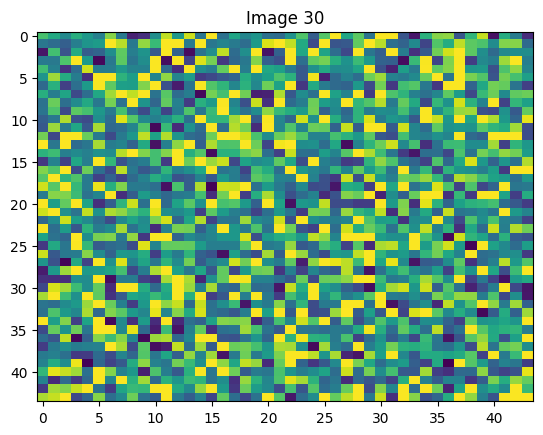

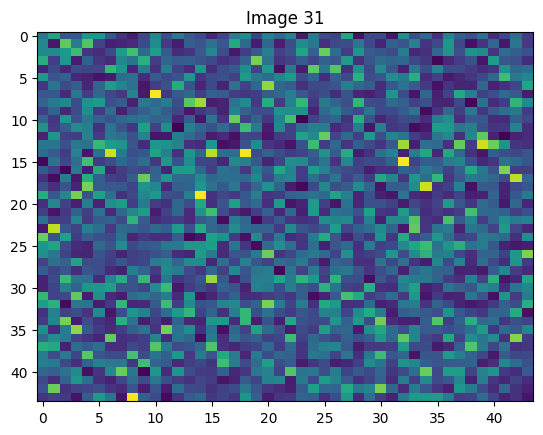

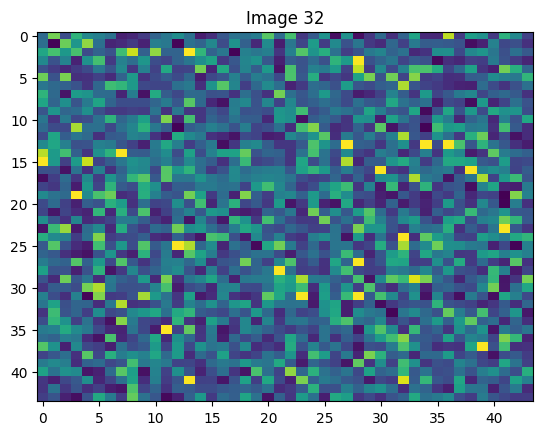

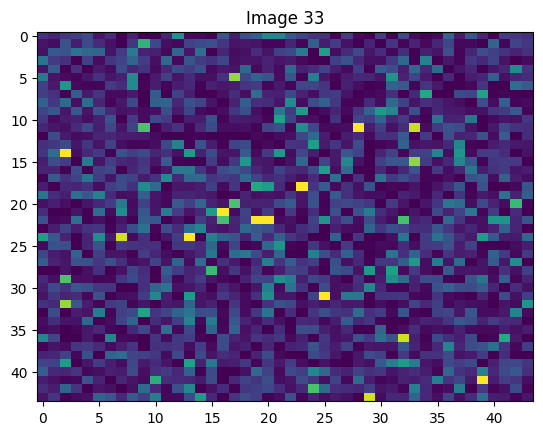

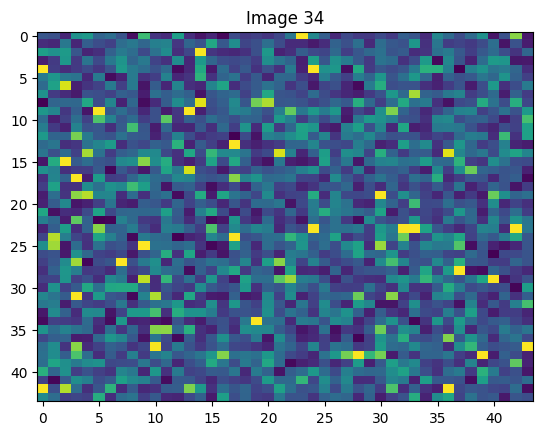

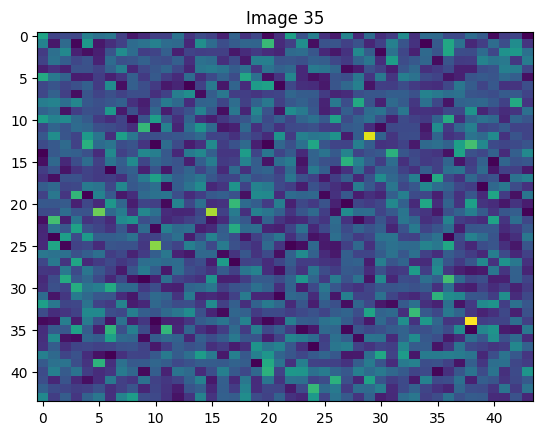

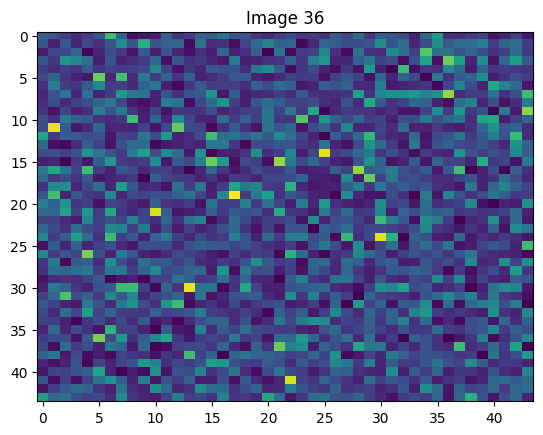

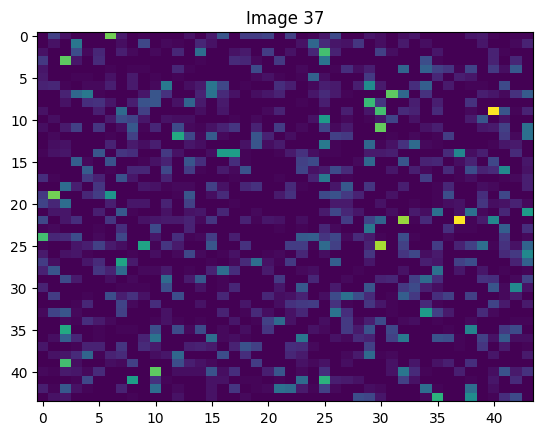

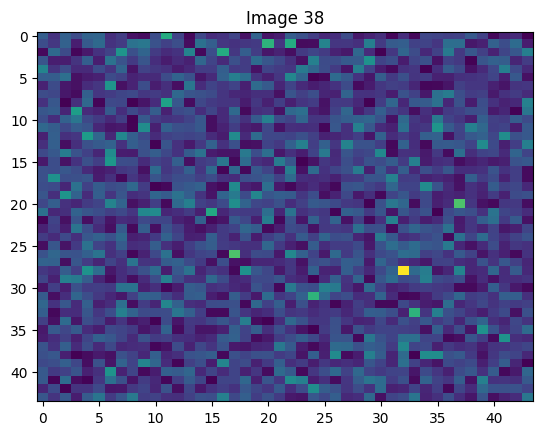

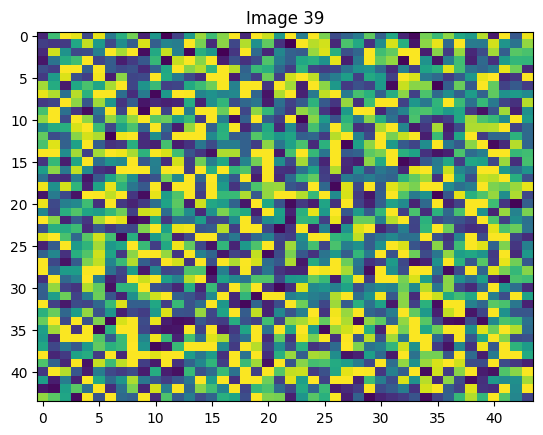

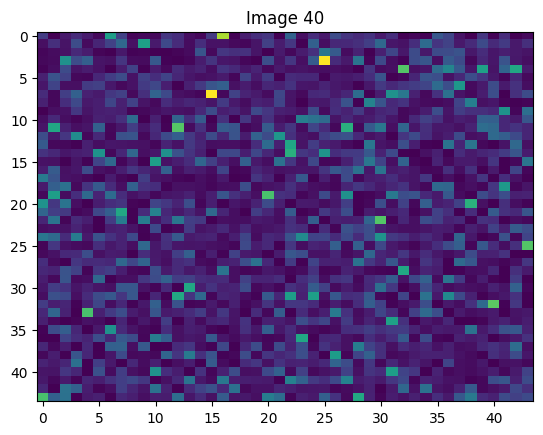

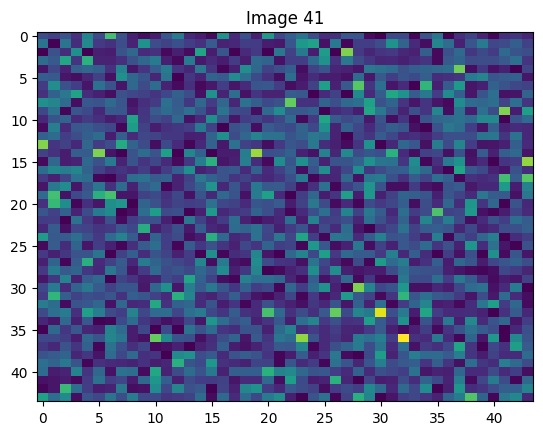

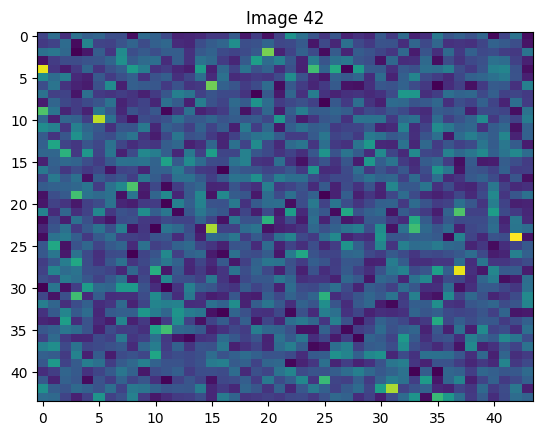

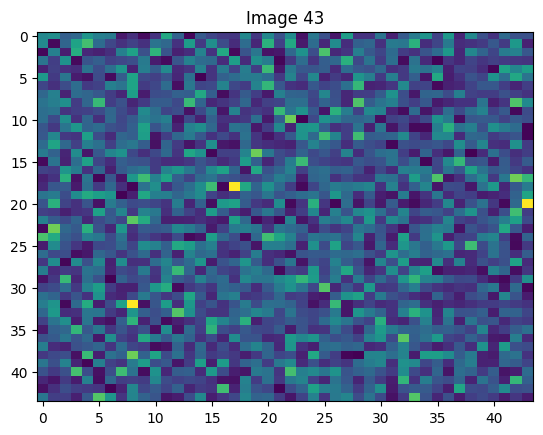

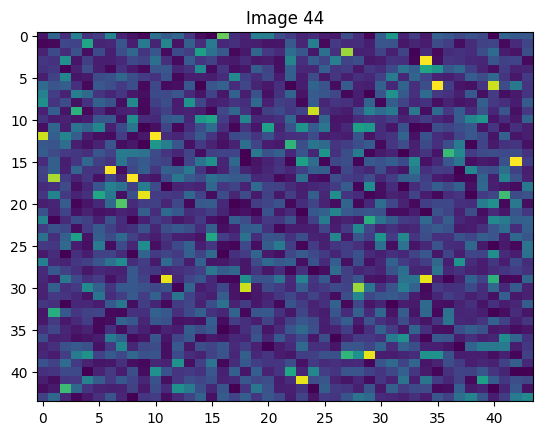

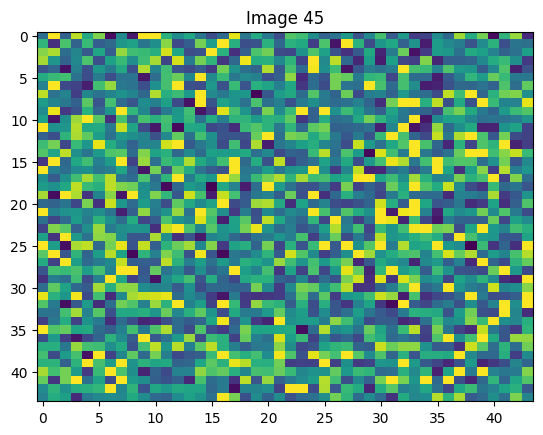

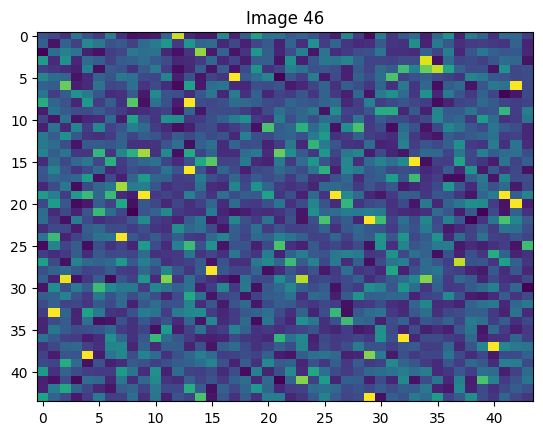

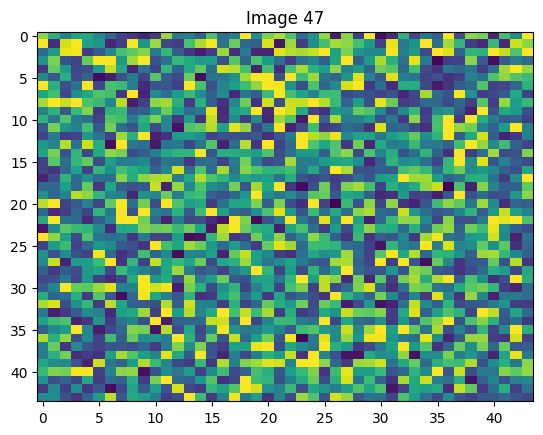

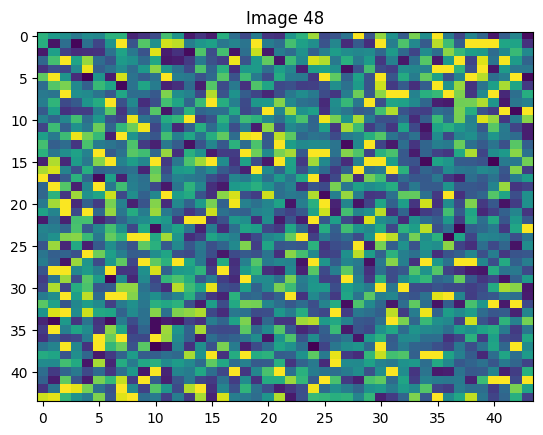

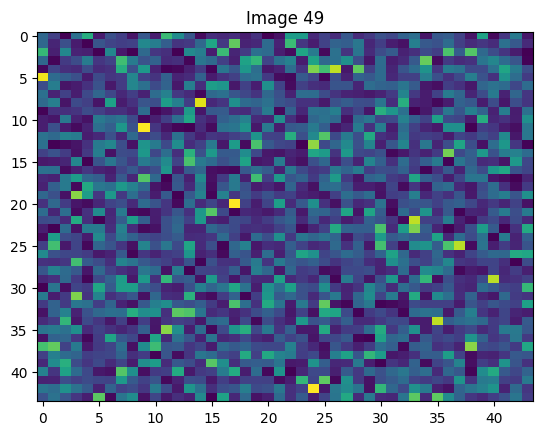

In [ ]:

# Assuming nrows, ncols is the shape of the selected features
nrows, ncols = X_train.shape
size = int(np.sqrt(ncols))  # Assuming the images are square

# Normalize the data to the range [0, 255]
min_val = np.min(X_train)
max_val = np.max(X_train)
X_train_normalized = ((X_train - min_val) / (max_val - min_val) * 255).astype(np.uint8)

# Convert the normalized features to a 2D image, where each row is an image
image_data = X_train_normalized.reshape((nrows, size, size))

# Display all images
for i in range(nrows):
    plt.imshow(image_data[i], cmap='viridis', aspect='auto')
    plt.title(f"Image {i + 1}")
    plt.show()


DENSENET

In [ ]:
# Build a DenseNet model without reshaping
from tensorflow.keras import regularizers

def build_densenet_model(input_shape, l1_strength=0.01):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))  # Flatten the 2D images
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(l1_strength)))
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(l1_strength)))
    model.add(layers.Dense(1, activation='sigmoid'))  # Assuming binary classification
    return model

# Assuming X_train_df.shape[1:] is the input shape
densenet_model = build_densenet_model(image_data.shape[1:])

# Compile the model
densenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = densenet_model.fit(image_data, y_train, epochs=17, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = densenet_model.predict(image_data)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions

# Calculate precision, recall,accuracy and F1 score
precision = sklearn.metrics.precision_score(y_train, y_pred_binary)
recall = sklearn.metrics.recall_score(y_train, y_pred_binary)
f1 = sklearn.metrics.f1_score(y_train, y_pred_binary)
accuracy = sklearn.metrics.accuracy_score(y_train, y_pred_binary)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
# Save the trained model (optional)
densenet_model.save('densenet_model.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/17
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 463ms/step - accuracy: 0.4089 - loss: 74.9934 - val_accuracy: 0.6000 - val_loss: 108.5720
Epoch 2/17
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.6736 - loss: 83.0467 - val_accuracy: 0.4000 - val_loss: 65.0941
Epoch 3/17
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.3985 - loss: 68.1664 - val_accuracy: 0.9000 - val_loss: 42.0200
Epoch 4/17
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.8007 - loss: 43.4407 - val_accuracy: 0.6000 - val_loss: 58.0710
Epoch 5/17
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7078 - loss: 48.7597 - val_accuracy: 0.8000 - val_loss: 48.1023
Epoch 6/17
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7837 - loss: 41.8669 - val_accuracy: 0.8000 - val_loss: 42.9448
Epoch 7/17
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7903 - loss: 40.9428 - val_accuracy: 0.8000 - val_loss: 42.7875
Epoch 8/17
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8283 - loss: 39.9192 - val_accuracy: 0.9000

(13, 44, 44)


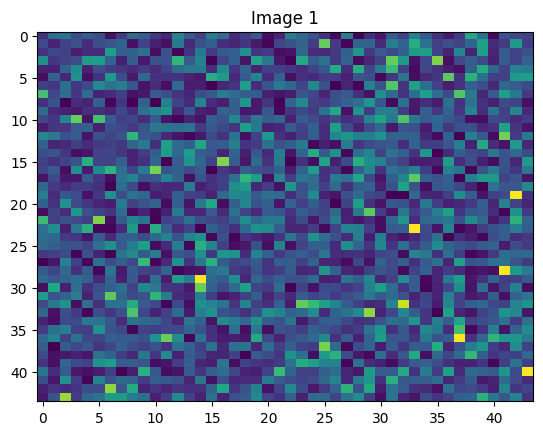

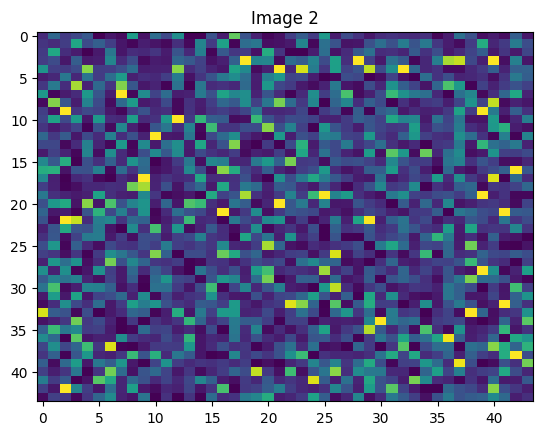

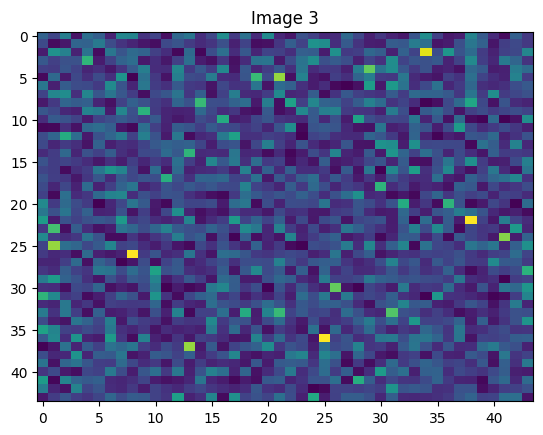

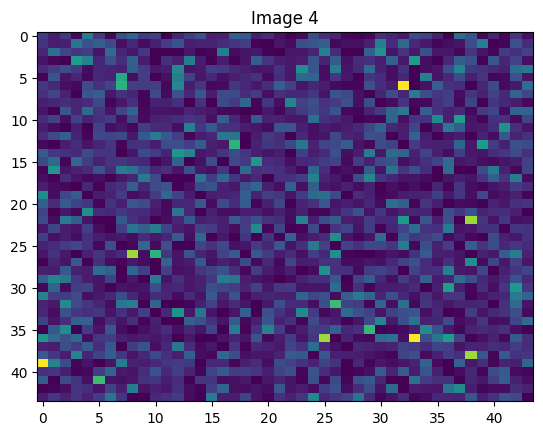

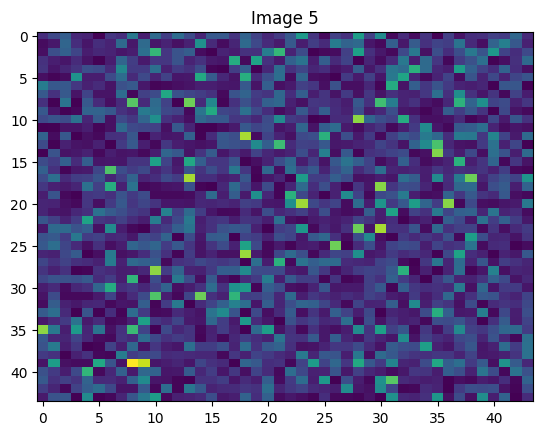

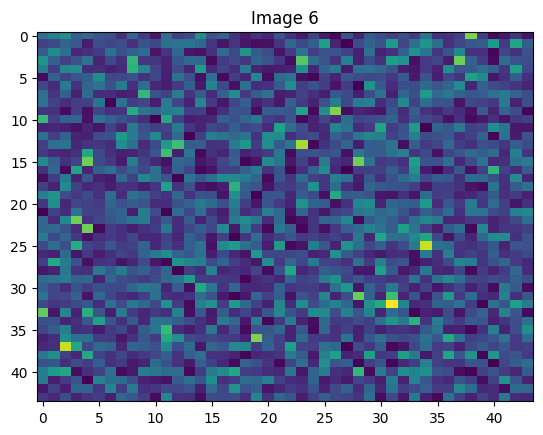

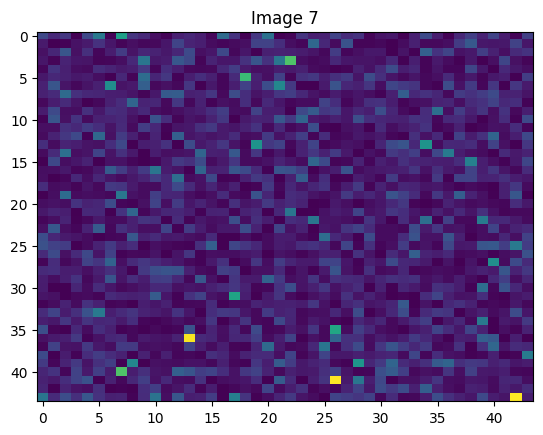

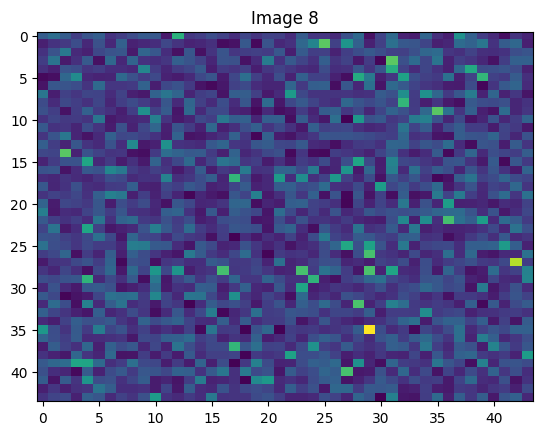

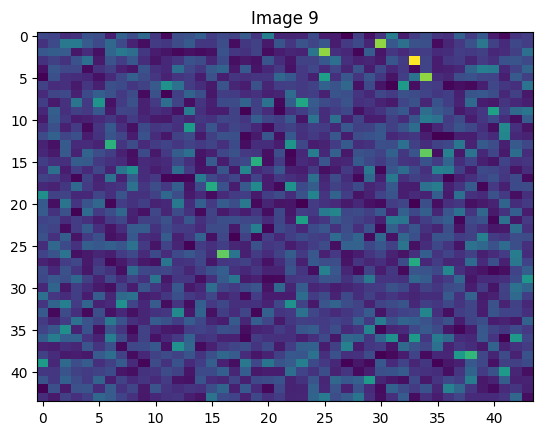

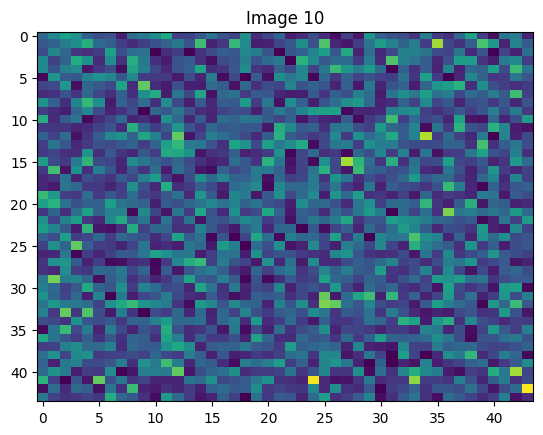

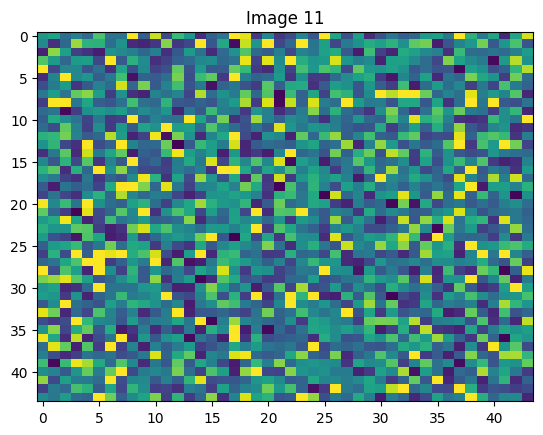

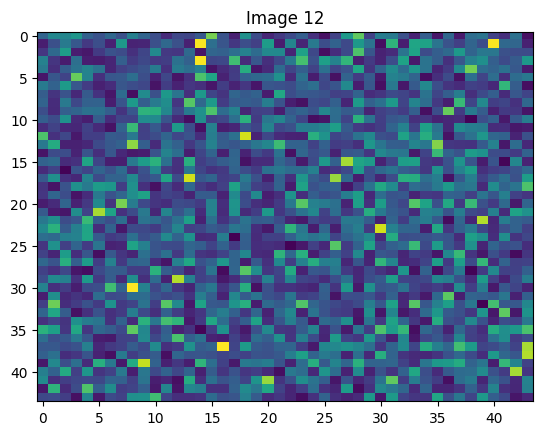

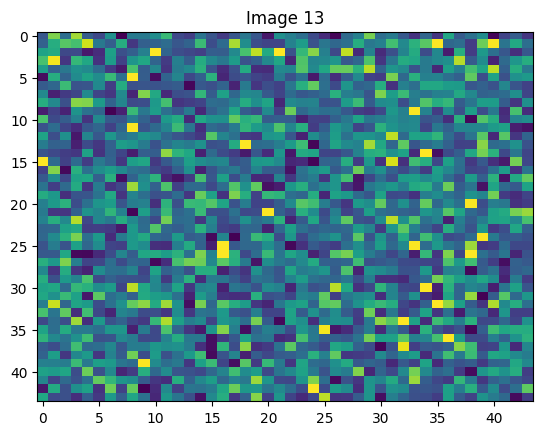

In [ ]:
nrows, ncols  = X_test.shape
# Normalize the data to the range [0, 1]

# Convert the normalized features to a 2D image, where each row is an image
image_data1 = (X_test * 255).astype(np.uint8).reshape((nrows, size, size))
#print(image_data)
print(image_data1.shape)
#Display all images
for i in range(nrows):
    plt.imshow(image_data1[i], cmap='viridis', aspect='auto')
    plt.title(f"Image {i + 1}")
    plt.show()

In [ ]:
# Train the model
history = densenet_model.fit(image_data1, y_test, epochs=20, batch_size=32, validation_split=0.2)


# Evaluate the model on the test set
loss, accuracy = densenet_model.evaluate(image_data1,y_test,verbose =0)

print(f'Accuracy: {accuracy:.4f}')
# Save the trained model (optional)
densenet_model.save('densenet_modelt.keras')

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.7000 - loss: 42.6813 - val_accuracy: 0.3333 - val_loss: 38.9988
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.7000 - loss: 41.4207 - val_accuracy: 0.3333 - val_loss: 39.0594
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.6000 - loss: 39.8645 - val_accuracy: 0.3333 - val_loss: 39.1608
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.5000 - loss: 37.7787 - val_accuracy: 0.3333 - val_loss: 39.2100
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.9000 - loss: 36.1456 - val_accuracy: 0.6667 - val_loss: 40.9960
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.8000 - loss: 36.2283 - val_accuracy: 0.3333 - val_loss: 39.3495
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8000 - loss: 35.0325 - val_accuracy: 0.6667 - val_loss: 39.1394
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.6000 - loss: 34.9699 - val_accuracy: 0.3

**CNN**

In [ ]:
# Ensure the input has a channel dimension (grayscale images)
image_data1 = np.expand_dims(image_data1, axis=-1)  # Adds a channel dimension at the last axis

# Define input shape with channels
input_shape = image_data1.shape[1:]  # Now it should be (height, width, 1)


In [ ]:
def build_cnn_model(input_shape):
    model = models.Sequential()

    # Use Input layer explicitly to avoid warnings
    model.add(layers.Input(shape=input_shape))

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flattening Layer
    model.add(layers.Flatten())

    # Fully Connected (Dense) Layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))

    # Output Layer (Binary Classification)
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

# Build and compile the CNN model
cnn_model = build_cnn_model(image_data1.shape[1:])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
cnn_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 42, 42, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 21, 21, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 19, 19, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 248,577 (971.00 KB)

 Trainable params: 248,577 (971.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the CNN model
history_cnn = cnn_model.fit(image_data1, y_test, epochs=20, batch_size=32, validation_split=0.2)

# Save the trained model (optional)
cnn_model.save('cnn_model.keras')


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3000 - loss: 8.8277 - val_accuracy: 0.3333 - val_loss: 16.7382
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.7000 - loss: 5.8021 - val_accuracy: 0.3333 - val_loss: 7.0073
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.7000 - loss: 2.4023 - val_accuracy: 0.6667 - val_loss: 3.6711
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.3000 - loss: 3.7827 - val_accuracy: 0.6667 - val_loss: 0.3999
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.8000 - loss: 0.4876 - val_accuracy: 0.3333 - val_loss: 5.7762
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.7000 - loss: 1.7896 - val_accuracy: 0.3333 - val_loss: 5.4884
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.7000 - loss: 1.4678 - val_accuracy: 0.3333 - val_loss: 2.1420
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.7000 - loss: 0.4307 - val_accuracy: 0.6667 - val_loss: 1

In [ ]:
# Evaluate the model on the test set
loss, accuracy = cnn_model.evaluate(image_data1, y_test, verbose=0)

print(f'CNN Model Accuracy: {accuracy:.4f}')


CNN Model Accuracy: 0.8462


In [ ]:
# Get predictions
y_pred = cnn_model.predict(image_data1)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions

# Calculate Precision, Recall, F1-score, and Accuracy
precision = sklearn.metrics.precision_score(y_test, y_pred_binary)
recall = sklearn.metrics.recall_score(y_test, y_pred_binary)
f1 = sklearn.metrics.f1_score(y_test, y_pred_binary)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_binary)

# Print metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
Precision: 1.0000
Recall: 0.6000
F1 Score: 0.7500
Accuracy: 0.8462


**DNN**

In [ ]:
from tensorflow.keras import models, layers, regularizers

def build_dnn_model(input_shape, l1_strength=0.01):
    model = models.Sequential()

    # Explicitly define the input layer
    model.add(layers.Input(shape=input_shape))

    # Flatten the input
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(l1_strength)))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(l1_strength)))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification output

    return model

# Initialize the model
dnn_model = build_dnn_model(image_data1.shape[1:])


In [ ]:
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Training DNN model


In [ ]:
history_dnn = dnn_model.fit(image_data1, y_test, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6000 - loss: 84.9589 - val_accuracy: 0.6667 - val_loss: 204.0646
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.3000 - loss: 166.5782 - val_accuracy: 0.3333 - val_loss: 125.2380
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.7000 - loss: 82.6656 - val_accuracy: 0.3333 - val_loss: 124.2360
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7000 - loss: 80.9353 - val_accuracy: 1.0000 - val_loss: 71.4215
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9000 - loss: 78.6757 - val_accuracy: 1.0000 - val_loss: 70.8423
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9000 - loss: 78.3729 - val_accuracy: 1.0000 - val_loss: 70.2653
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9000 - loss: 74.6244 - val_accuracy: 0.3333 - val_loss: 94.7641
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 1.0000 - loss: 69.6920 - val_accuracy: 0.333

In [ ]:
loss, accuracy = dnn_model.evaluate(image_data1, y_test, verbose=0)
print(f'DNN Model Accuracy: {accuracy:.4f}')


DNN Model Accuracy: 1.0000


In [ ]:
y_pred_dnn = dnn_model.predict(image_data1)
y_pred_binary_dnn = np.round(y_pred_dnn)  # Convert probabilities to binary values


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision_dnn = precision_score(y_test, y_pred_binary_dnn)
recall_dnn = recall_score(y_test, y_pred_binary_dnn)
f1_dnn = f1_score(y_test, y_pred_binary_dnn)
accuracy_dnn = accuracy_score(y_test, y_pred_binary_dnn)

print(f'Precision: {precision_dnn:.4f}')
print(f'Recall: {recall_dnn:.4f}')
print(f'F1 Score: {f1_dnn:.4f}')
print(f'Accuracy: {accuracy_dnn:.4f}')

dnn_model.save('dnn_model.keras')


Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Accuracy: 1.0000
